# Radio Foundation Models Lab

![Radio Foundation Model](https://drive.google.com/uc?export=view&id=1QwFZSPN28VRSRgCoT-1m75MWaGfsqhtp)

In this lab, we will fine-tune a pretrained radio foundation model with a Vision Transformer architecture for various tasks:

- **Radio Signal Identification**: Classify a radio signal based on its spectrogram representation into one of 20 classes, including WiFi, Cellular, Bluetooth, LoRa, and others.
- **Human Activity Sensing**: Detect human activity near WiFi access points operating as passive radars. Channel state information is used to classify activities into one of six categories: running, walking, falling, floor cleaning, boxing, and arm circling.
- **5G Positioning**: Utilize 5G sounding reference signals to compute users' channel state information and estimate their positions.

More details about the tasks will be provided in the notebook. If you're interested in learning more about how the model is pretrained, please refer to this [paper](https://arxiv.org/abs/2411.09996).


## **⚠️ Important:**  

### Downloading the Datasets  

Before proceeding, you need to download the datasets. Visit the following [link](https://uofc-my.sharepoint.com/:f:/g/personal/ahmed_aboulfotouh_ucalgary_ca/EoNyesd8BQFDqwm4GVN3bWQBLmtX55MU-cgn_9W4OjNdAA?e=AFwtZK), where you will find three directories:  

- `radio_signal_identification`  
- `human_activity_sensing`  
- `5g_positioning`  

We recommend creating a directory named **`data`** in your working directory and organizing the datasets into three subdirectories with the same names.  


### Downloading the Models  

Next, download the pretrained models from this [link](https://uofc-my.sharepoint.com/:f:/g/personal/ahmed_aboulfotouh_ucalgary_ca/Ejr2YYjJZrpFkXuUo61y-38BEwEKxiPYMGbIcrhJhGeMyQ?e=NfpIvC). There are three different models, varying in size:  

- **Small**: `pretrained_small_75.pth`  
- **Medium**: `pretrained_medium_75.pth`  
- **Large**: `pretrained_large_75.pth`  

We recommend using the **small model** for fine-tuning; however, feel free to experiment with other model sizes.  

For organization, we suggest creating a **`checkpoints`** directory in your working directory to store the pretrained models.

### 📌 **Required Installations**
If you haven't installed all the required dependencies, run the following command to ensure the required libraries are installed:

```bash
pip install numpy matplotlib torch timm scipy tqdm scikit-learn seaborn h5py pillow torchvision timm
```

If you are using **google colaboratory**, skip this step.

## [1] Imports  

In this section, we install and import the necessary libraries required for the code to run.  

In [18]:
import os

def modify_filenames(directory, n):
    # Get all files in the directory
    for filename in os.listdir(directory):
        # Skip directories
        if os.path.isdir(os.path.join(directory, filename)):
            continue

        # Remove all underscores from the filename
        new_filename = filename.replace("_", "")

        # Insert underscore at the nth position (if n is within the new filename length)
        if n < len(new_filename):
            new_filename = new_filename[:n] + "_" + new_filename[n:]

        # Create full file paths
        old_file_path = os.path.join(directory, filename)
        new_file_path = os.path.join(directory, new_filename)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {filename} -> {new_filename}")

# Directory containing the files
directory = "your_directory_here"  # Update with your folder path

# The position to insert the underscore (n-th character)
n = 5  # For example, insert an underscore after the 5th character

modify_filenames('audio_processing/sample_dataset/arabic', 6)
modify_filenames('audio_processing/sample_dataset/english', 7)
modify_filenames('audio_processing/sample_dataset/german', 6)
modify_filenames('audio_processing/sample_dataset/mandarin', 8)
modify_filenames('audio_processing/sample_dataset/spanish', 7)

Renamed: arabic_19058307000.png -> arabic_19058307000.png
Renamed: arabic_19058308000.png -> arabic_19058308000.png
Renamed: arabic_19058309000.png -> arabic_19058309000.png
Renamed: arabic_19058310000.png -> arabic_19058310000.png
Renamed: arabic_19058311000.png -> arabic_19058311000.png
Renamed: arabic_19058343000.png -> arabic_19058343000.png
Renamed: arabic_19058344000.png -> arabic_19058344000.png
Renamed: arabic_19058345000.png -> arabic_19058345000.png
Renamed: arabic_19058346000.png -> arabic_19058346000.png
Renamed: arabic_19058347000.png -> arabic_19058347000.png
Renamed: arabic_19058363000.png -> arabic_19058363000.png
Renamed: arabic_19058364000.png -> arabic_19058364000.png
Renamed: arabic_19058365000.png -> arabic_19058365000.png
Renamed: arabic_19058366000.png -> arabic_19058366000.png
Renamed: arabic_19058368000.png -> arabic_19058368000.png
Renamed: arabic_19058370000.png -> arabic_19058370000.png
Renamed: arabic_19058373000.png -> arabic_19058373000.png
Renamed: arabi

In [19]:
import shutil
import os

def copy_all_files(src_dir, dest_dir):
    # Ensure destination directory exists
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)  # Create the destination directory if it doesn't exist
    
    # Loop through all files and directories in the source directory
    for item in os.listdir(src_dir):
        src_path = os.path.join(src_dir, item)
        dest_path = os.path.join(dest_dir, item)
        
        # Check if it's a file or directory and copy accordingly
        if os.path.isdir(src_path):
            # Recursively copy the directory and its contents
            shutil.copytree(src_path, dest_path)
        else:
            # Copy the file
            shutil.copy2(src_path, dest_path)  # copy2 to preserve metadata (timestamps, etc.)
    
    print(f"All contents from {src_dir} have been copied to {dest_dir}")

# Example usage
src_directory = "path/to/source/folder"  # Replace with your source folder path
dest_directory = "path/to/destination/folder"  # Replace with your destination folder path

copy_all_files('audio_processing/sample_dataset/arabic', 'languages')
copy_all_files('audio_processing/sample_dataset/english', 'languages')
copy_all_files('audio_processing/sample_dataset/german', 'languages')
copy_all_files('audio_processing/sample_dataset/mandarin', 'languages')
copy_all_files('audio_processing/sample_dataset/spanish', 'languages')

All contents from audio_processing/sample_dataset/arabic have been copied to languages
All contents from audio_processing/sample_dataset/english have been copied to languages
All contents from audio_processing/sample_dataset/german have been copied to languages
All contents from audio_processing/sample_dataset/mandarin have been copied to languages
All contents from audio_processing/sample_dataset/spanish have been copied to languages


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from random import sample
from PIL import Image
import timm.models.vision_transformer
from timm.layers import trunc_normal_
import math
import sys
from typing import Iterable
from timm.utils import accuracy
import datetime
import time
from collections import defaultdict, deque
import torch.distributed as dist
from torch.utils.data import DataLoader, random_split
from torch import nn
from functools import partial
import torch.nn.functional as F
from scipy.io import loadmat
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torch.utils.data import Dataset
import re
import h5py
from torchvision.transforms import (
    Grayscale, ToTensor, Compose, Resize, InterpolationMode, Normalize, Lambda
)
plt.rcParams['font.family'] = 'serif'

## [2] Setup & Utilities

This section contains **important setup code** for model training and evaluation. You may skip the details, but ensure the utilities are executed before proceeding.

### Training Verbose Utilities
These utilities are optional to look through and understand. They are used for printing logs and tracking performance during training.

In [21]:
def is_dist_avail_and_initialized():
    if not dist.is_available():
        return False
    if not dist.is_initialized():
        return False
    return True


class SmoothedValue(object):
    """Track a series of values and provide access to smoothed values over a
    window or the global series average.
    """

    def __init__(self, window_size=20, fmt=None):
        if fmt is None:
            fmt = "{median:.4f} ({global_avg:.4f})"
        self.deque = deque(maxlen=window_size)
        self.total = 0.0
        self.count = 0
        self.fmt = fmt

    def update(self, value, n=1):
        self.deque.append(value)
        self.count += n
        self.total += value * n

    def synchronize_between_processes(self):
        """
        Warning: does not synchronize the deque!
        """
        if not is_dist_avail_and_initialized():
            return
        t = torch.tensor([self.count, self.total], dtype=torch.float64, device='cuda')
        dist.barrier()
        dist.all_reduce(t)
        t = t.tolist()
        self.count = int(t[0])
        self.total = t[1]

    @property
    def median(self):
        d = torch.tensor(list(self.deque))
        return d.median().item()

    @property
    def avg(self):
        d = torch.tensor(list(self.deque), dtype=torch.float32)
        return d.mean().item()

    @property
    def global_avg(self):
        return self.total / self.count

    @property
    def max(self):
        return max(self.deque)

    @property
    def value(self):
        return self.deque[-1]

    def __str__(self):
        return self.fmt.format(
            median=self.median,
            avg=self.avg,
            global_avg=self.global_avg,
            max=self.max,
            value=self.value)


class MetricLogger(object):
    def __init__(self, delimiter="\t"):
        self.meters = defaultdict(SmoothedValue)
        self.delimiter = delimiter

    def update(self, **kwargs):
        for k, v in kwargs.items():
            if v is None:
                continue
            if isinstance(v, torch.Tensor):
                v = v.item()
            assert isinstance(v, (float, int))
            self.meters[k].update(v)

    def __getattr__(self, attr):
        if attr in self.meters:
            return self.meters[attr]
        if attr in self.__dict__:
            return self.__dict__[attr]
        raise AttributeError("'{}' object has no attribute '{}'".format(
            type(self).__name__, attr))

    def __str__(self):
        loss_str = []
        for name, meter in self.meters.items():
            loss_str.append(
                "{}: {}".format(name, str(meter))
            )
        return self.delimiter.join(loss_str)

    def synchronize_between_processes(self):
        for meter in self.meters.values():
            meter.synchronize_between_processes()

    def add_meter(self, name, meter):
        self.meters[name] = meter

    def log_every(self, iterable, print_freq, header=None):
        i = 0
        if not header:
            header = ''
        start_time = time.time()
        end = time.time()
        iter_time = SmoothedValue(fmt='{avg:.4f}')
        data_time = SmoothedValue(fmt='{avg:.4f}')
        space_fmt = ':' + str(len(str(len(iterable)))) + 'd'
        log_msg = [
            header,
            '[{0' + space_fmt + '}/{1}]',
            'eta: {eta}',
            '{meters}',
            'time: {time}',
            'data: {data}'
        ]
        if torch.cuda.is_available():
            log_msg.append('max mem: {memory:.0f}')
        log_msg = self.delimiter.join(log_msg)
        MB = 1024.0 * 1024.0
        for obj in iterable:
            data_time.update(time.time() - end)
            yield obj
            iter_time.update(time.time() - end)
            if i % print_freq == 0 or i == len(iterable) - 1:
                eta_seconds = iter_time.global_avg * (len(iterable) - i)
                eta_string = str(datetime.timedelta(seconds=int(eta_seconds)))
                if torch.cuda.is_available():
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time),
                        memory=torch.cuda.max_memory_allocated() / MB))
                else:
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time)))
            i += 1
            end = time.time()
        total_time = time.time() - start_time
        total_time_str = str(datetime.timedelta(seconds=int(total_time)))
        print('{} Total time: {} ({:.4f} s / it)'.format(
            header, total_time_str, total_time / len(iterable)))


### Learning and Optimization Utilities  

These utilities handle learning rate scheduling, gradient scaling, and other optimization techniques. They are quite complex, so feel free to skip them.  


In [22]:
def adjust_learning_rate(optimizer, epoch, warmup_epochs, lr, min_lr=1e-6):
    """Decay the learning rate with half-cycle cosine after warmup"""
    if epoch < warmup_epochs:
        lr = lr * epoch / warmup_epochs
    else:
        lr = min_lr + (lr - min_lr) * 0.5 * \
            (1. + math.cos(math.pi * (epoch - warmup_epochs) / (epochs - warmup_epochs)))
    for param_group in optimizer.param_groups:
        if "lr_scale" in param_group:
            param_group["lr"] = lr * param_group["lr_scale"]
        else:
            param_group["lr"] = lr
    return lr

def get_layer_id_for_vit(name, num_layers):
    """
    Assign a parameter with its layer id
    Following BEiT: https://github.com/microsoft/unilm/blob/master/beit/optim_factory.py#L33
    """
    if name in ['cls_token', 'pos_embed']:
        return 0
    elif name.startswith('patch_embed'):
        return 0
    elif name.startswith('blocks'):
        return int(name.split('.')[1]) + 1
    else:
        return num_layers

def param_groups_lrd(model, weight_decay=0.05, no_weight_decay_list=[], layer_decay=.75):
    """
    Parameter groups for layer-wise lr decay
    Following BEiT: https://github.com/microsoft/unilm/blob/master/beit/optim_factory.py#L58
    """
    param_group_names = {}
    param_groups = {}

    num_layers = len(model.blocks) + 1

    layer_scales = list(layer_decay ** (num_layers - i) for i in range(num_layers + 1))

    for n, p in model.named_parameters():
        if not p.requires_grad:
            continue

        # no decay: all 1D parameters and model specific ones
        if p.ndim == 1 or n in no_weight_decay_list:
            g_decay = "no_decay"
            this_decay = 0.
        else:
            g_decay = "decay"
            this_decay = weight_decay

        layer_id = get_layer_id_for_vit(n, num_layers)
        group_name = "layer_%d_%s" % (layer_id, g_decay)

        if group_name not in param_group_names:
            this_scale = layer_scales[layer_id]

            param_group_names[group_name] = {
                "lr_scale": this_scale,
                "weight_decay": this_decay,
                "params": [],
            }
            param_groups[group_name] = {
                "lr_scale": this_scale,
                "weight_decay": this_decay,
                "params": [],
            }

        param_group_names[group_name]["params"].append(n)
        param_groups[group_name]["params"].append(p)

    # print("parameter groups: \n%s" % json.dumps(param_group_names, indent=2))

    return list(param_groups.values())

def get_grad_norm_(parameters, norm_type: float = 2.0) -> torch.Tensor:
    if isinstance(parameters, torch.Tensor):
        parameters = [parameters]
    parameters = [p for p in parameters if p.grad is not None]
    norm_type = float(norm_type)
    if len(parameters) == 0:
        return torch.tensor(0.)
    device = parameters[0].grad.device
    if norm_type == torch.inf:
        total_norm = max(p.grad.detach().abs().max().to(device) for p in parameters)
    else:
        total_norm = torch.norm(torch.stack([torch.norm(p.grad.detach(), norm_type).to(device) for p in parameters]), norm_type)
    return total_norm

class NativeScalerWithGradNormCount:
    state_dict_key = "amp_scaler"

    def __init__(self):
        self._scaler = torch.cuda.amp.GradScaler()

    def __call__(self, loss, optimizer, clip_grad=None, parameters=None, create_graph=False, update_grad=True):
        self._scaler.scale(loss).backward(create_graph=create_graph)
        if update_grad:
            if clip_grad is not None:
                assert parameters is not None
                self._scaler.unscale_(optimizer)  # unscale the gradients of optimizer's assigned params in-place
                norm = torch.nn.utils.clip_grad_norm_(parameters, clip_grad)
            else:
                self._scaler.unscale_(optimizer)
                norm = get_grad_norm_(parameters)
            self._scaler.step(optimizer)
            self._scaler.update()
        else:
            norm = None
        return norm

    def state_dict(self):
        return self._scaler.state_dict()

    def load_state_dict(self, state_dict):
        self._scaler.load_state_dict(state_dict)


class LabelSmoothingCrossEntropy(nn.Module):
    """ NLL loss with label smoothing.
    """
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingCrossEntropy, self).__init__()
        assert smoothing < 1.0
        self.smoothing = smoothing
        self.confidence = 1. - smoothing

    def forward(self, x: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        logprobs = F.log_softmax(x, dim=-1)
        nll_loss = -logprobs.gather(dim=-1, index=target.unsqueeze(1))
        nll_loss = nll_loss.squeeze(1)
        smooth_loss = -logprobs.mean(dim=-1)
        loss = self.confidence * nll_loss + self.smoothing * smooth_loss
        return loss.mean()

### Model Training Utilities  

This section contains utility functions that will be useful across all tasks.  

In [23]:
def train_one_epoch(model: torch.nn.Module, criterion: torch.nn.Module,
                    data_loader: Iterable, optimizer: torch.optim.Optimizer,
                    device: torch.device, epoch: int, warmup_epochs: int, lr, loss_scaler,
                    task: str = "classification"):
    """
    Trains the model for one epoch, supporting both classification and regression tasks.

    Parameters:
    ----------
    model : torch.nn.Module
        The model to train.
    criterion : torch.nn.Module
        The loss function.
    data_loader : Iterable
        The dataset loader.
    optimizer : torch.optim.Optimizer
        The optimizer used for training.
    device : torch.device
        Device to run training on (CPU or GPU).
    epoch : int
        Current epoch number.
    loss_scaler : callable
        Function to scale loss for mixed precision training.
    max_norm : float, optional
        Gradient clipping norm, by default 0.
    log_writer : object, optional
        Logger for TensorBoard, by default None.
    args : object, optional
        Additional training arguments.
    task : str, optional
        Task type: `"classification"` or `"regression"`, by default `"classification"`.

    Returns:
    -------
    dict
        Averaged metrics (loss, accuracy if classification).
    """
    model.train(True)
    metric_logger = MetricLogger(delimiter="  ")
    metric_logger.add_meter('lr', SmoothedValue(window_size=1, fmt='{value:.6f}'))
    header = f'Epoch: [{epoch}]'
    print_freq = 20

    optimizer.zero_grad()


    for data_iter_step, (samples, targets) in enumerate(metric_logger.log_every(data_loader, print_freq, header)):

        # Adjust learning rate per iteration
        adjust_learning_rate(optimizer, data_iter_step / len(data_loader) + epoch, warmup_epochs, lr)

        samples, targets = samples.to(device, non_blocking=True), targets.to(device, non_blocking=True)

        # Forward pass
        with torch.cuda.amp.autocast():
            outputs = model(samples)
            loss = criterion(outputs, targets)

        loss_value = loss.item()
        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping training")
            sys.exit(1)

        # Backpropagation
        loss_scaler(loss, optimizer, parameters=model.parameters(), create_graph=False,
                    update_grad=True)
        optimizer.zero_grad()

        #torch.cuda.synchronize()

        # Update metrics
        metric_logger.update(loss=loss_value)

        if task == "classification":
            acc1, acc3 = accuracy(outputs, targets, topk=(1, 3))
            metric_logger.meters['acc1'].update(acc1.item(), n=samples.shape[0])
            metric_logger.meters['acc3'].update(acc3.item(), n=samples.shape[0])

        # Track learning rate
        max_lr = max(group["lr"] for group in optimizer.param_groups)
        metric_logger.update(lr=max_lr)

    # Synchronize metrics across processes
    metric_logger.synchronize_between_processes()
    print("Averaged stats:", metric_logger)

    return {k: meter.global_avg for k, meter in metric_logger.meters.items()}


@torch.no_grad()
def evaluate(data_loader, model, criterion, device, task: str = "classification"):
    """
    Evaluates the model on the provided dataset.

    Parameters:
    ----------
    data_loader : Iterable
        Dataset loader.
    model : torch.nn.Module
        The model to evaluate.
    criterion : torch.nn.Module
        Loss function.
    device : torch.device
        Device for evaluation.
    task : str, optional
        Task type: `"classification"` or `"regression"`, by default `"classification"`.

    Returns:
    -------
    dict
        Averaged evaluation metrics.
    """
    metric_logger = MetricLogger(delimiter="  ")
    header = 'Test:'

    model.eval()

    for batch in metric_logger.log_every(data_loader, 10, header):
        images, targets = batch[0].to(device, non_blocking=True), batch[-1].to(device, non_blocking=True)

        # Compute output
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, targets)

        metric_logger.update(loss=loss.item())

        if task == "classification":
            acc1, acc3 = accuracy(outputs, targets, topk=(1, 3))
            metric_logger.meters['acc1'].update(acc1.item(), n=images.shape[0])
            metric_logger.meters['acc3'].update(acc3.item(), n=images.shape[0])

    # Synchronize metrics across processes
    metric_logger.synchronize_between_processes()

    if task == "classification":
        print('* Acc@1 {top1.global_avg:.3f} Acc@3 {top3.global_avg:.3f} loss {losses.global_avg:.3f}'
              .format(top1=metric_logger.acc1, top3=metric_logger.acc3, losses=metric_logger.loss))
    else:
        print('* Loss {losses.global_avg:.3f}'.format(losses=metric_logger.loss))

    return {k: meter.global_avg for k, meter in metric_logger.meters.items()}


## [3] Vision Transformer Class  

This section defines a **custom Vision Transformer (ViT) model** that extends the `timm` implementation. This is the architecture we use for the **Radio Foundation Model**.

### Key Features:
- **Global Pooling Support:**  
  - Supports different pooling strategies (`'token'`, `'avg'`, `'max'`, etc.).
- **Tanh Activation:**  
  - Can apply a **tanh activation function** in the output.
- **Encoder Freezing:**  
  - Allows freezing either the **entire transformer encoder** or **a specified number of blocks**.
- **Pretrained Model Loading:**  
  - Implements methods to **load weights from a checkpoint**.  

This model is designed to be flexible and easily integrated into various tasks.


In [24]:
class VisionTransformer(timm.models.vision_transformer.VisionTransformer):
    """
    A custom Vision Transformer (ViT) model extending the timm VisionTransformer implementation.

    This class supports:
    - **Global Pooling Strategies**: Allows different pooling methods ('token', 'avg', 'max', etc.).
    - **Tanh Activation**: Applies tanh activation to the output if enabled.
    - **Encoder Freezing**: Allows freezing part or all of the transformer encoder.
    - **Checkpoint Handling**: Supports loading model weights from a checkpoint.

    Attributes:
    ----------
    task : str, required
        Specifies the task ('signal_identification', 'sensing', 'positioning')
    global_pool : str
        The pooling method to apply. Options: 'token', 'avg', 'max', etc.
    tanh : bool
        Applies tanh activation to the final output if set to True.
    """

    def __init__(self, task: str, global_pool: str = "token", tanh: bool = False, **kwargs):
        """
        Initializes the Vision Transformer model.

        Parameters:
        ----------
        global_pool : str, optional
            Specifies the pooling method ('token', 'avg', 'max', etc.), by default "token".
        tanh : bool, optional
            Whether to apply tanh activation to the output, by default False.
        kwargs : dict
            Additional arguments for the base VisionTransformer class.
        """
        super(VisionTransformer, self).__init__(**kwargs)
        self.task = task
        self.global_pool = global_pool
        self.tanh = tanh

    def freeze_encoder(self, num_blocks: int = None):
        """
        Freezes the transformer encoder to prevent updates during training.

        Parameters:
        ----------
        num_blocks : int, optional
            The number of transformer blocks to freeze. If None, freezes the entire encoder.
        """
        if num_blocks is None:
            for param in self.blocks.parameters():
                param.requires_grad = False
        else:
            for param in self.blocks[:num_blocks].parameters():
                param.requires_grad = False

        # Also freeze the patch embedding layer
        for param in self.patch_embed.proj.parameters():
            param.requires_grad = False

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Vision Transformer.

        Parameters:
        ----------
        x : torch.Tensor
            Input tensor of shape (batch_size, channels, height, width).

        Returns:
        -------
        torch.Tensor
            Output tensor after the forward pass.
        """
        x = self.forward_features(x)  # Extracts features using the transformer backbone
        x = self.forward_head(x)  # Passes features through the classifier head

        if self.tanh:
            return torch.tanh(x)  # Applies tanh activation if enabled
        return x

    def save_model(self, path: str):
        """
        Saves the model's state dictionary to a checkpoint file.

        Parameters:
        ----------
        path : str
            Path where the model checkpoint will be saved.
        """
        checkpoint = {
            "model": self.state_dict(),  # Save model weights
        }

        torch.save(checkpoint, path)
        print(f"Model successfully saved to {path}")

    def load_model(self, checkpoint_path: str) -> dict:
        """
        Loads model weights from a given checkpoint file.

        Parameters:
        ----------
        checkpoint_path : str
            Path to the checkpoint file.

        Returns:
        -------
        dict
            A message indicating the status of the checkpoint loading.
        """
        checkpoint = torch.load(checkpoint_path, map_location='cpu')  # Load checkpoint
        checkpoint_model = checkpoint['model']  # Extract model weights
        msg = self.load_state_dict(checkpoint_model, strict=True)  # Load state dictionary
        return msg  # Return loading message

    def load_from_pretrained(self, path: str):
        """
        Loads a model from a pretrained checkpoint while handling task-specific modifications.

        Parameters:
        ----------
        path : str
            Path to the pretrained model checkpoint.

        Returns:
        -------
        msg : dict
            A message from `load_state_dict()` indicating missing/unexpected keys.
        """
        # Load checkpoint
        checkpoint = torch.load(path, map_location='cpu')
        checkpoint_model = checkpoint.get('model', {})

        # Get current model's state dictionary
        state_dict = self.state_dict()

        # Define keys to be removed if mismatched
        keys_to_remove = ['head.weight', 'head.bias']

        if self.task in ['sensing', 'positioning']:
            keys_to_remove.append('pos_embed')

        # Remove incompatible keys
        for key in keys_to_remove:
            if key in checkpoint_model and checkpoint_model[key].shape != state_dict[key].shape:
                print(f"Removing key {key} from pretrained checkpoint")
                del checkpoint_model[key]

        # Adjust patch embedding projection layer for specific tasks
        patch_embed_key = 'patch_embed.proj.weight'
        if self.task == 'sensing':
            checkpoint_model[patch_embed_key] = checkpoint_model[patch_embed_key].expand(-1, 3, -1, -1)
        elif self.task == 'positioning':
            checkpoint_model[patch_embed_key] = checkpoint_model[patch_embed_key].expand(-1, 4, -1, -1)

        # Load state dictionary with `strict=False` to allow missing/unexpected keys
        msg = self.load_state_dict(checkpoint_model, strict=False)
        # Manually initialize fc layer
        #trunc_normal_(self.head.weight, std=2e-5)

        # If self.head is Sequential, access the first layer's weights
        if isinstance(self.head, torch.nn.Sequential):
            trunc_normal_(self.head[0].weight, std=2e-5)  
        else:
            trunc_normal_(self.head.weight, std=2e-5)  
        return msg

# ⚙️ Main Task Data Model




## Data Visualization

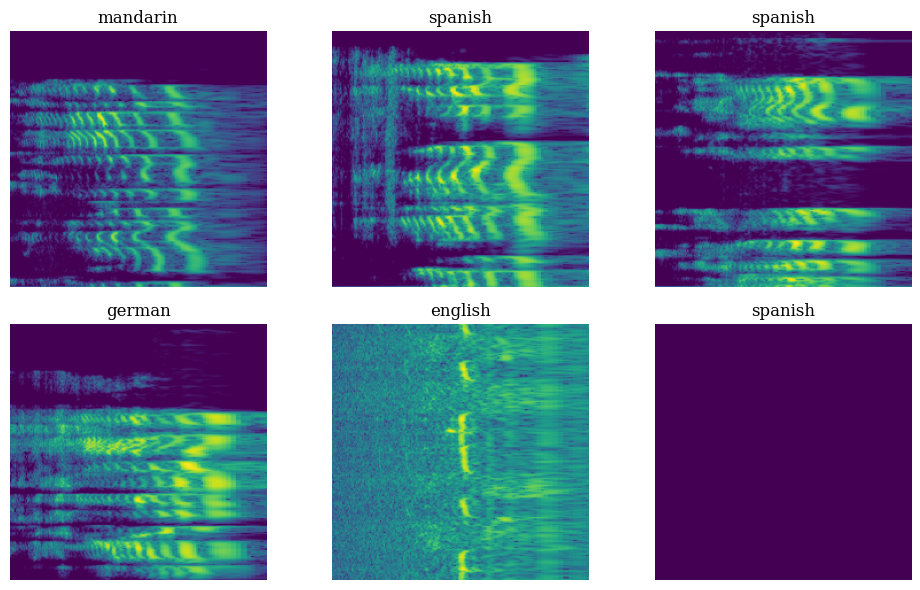

In [25]:
# Define the dataset path (Update if the path is different)
data_dir2 = Path("languages")
#data_dir2 = Path("/content/drive/MyDrive/ENDG_511_Lab2_Seleem_Badawy_Benjamin_Pele/data/radio_signal_identification/radio_signal_identification")

# List all spectrogram files in the directory
spectrogram_filenames = os.listdir(data_dir2)
# Number of spectrogram samples to visualize
num_samples = 6
# Randomly select 'num_samples' spectrogram files from the dataset
selected_files = sample(spectrogram_filenames, num_samples)

# Create a 2x3 grid for visualization
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
# Iterate through selected files and plot spectrograms
for i, ax in enumerate(axes.ravel()):
    # Load spectrogram image
    spectrogram_path = os.path.join(data_dir2, selected_files[i])
    spectrogram = np.array(Image.open(spectrogram_path).convert("L").resize((224, 224))).T
    # Ensure the spectrogram has correct dimensions
    spectrogram = np.squeeze(spectrogram)
    # Display the spectrogram
    ax.imshow(spectrogram, cmap="viridis")  # Ensuring a grayscale colormap
    ax.set_title(selected_files[i].split('_')[0])  # Extract class label from filename
    ax.axis("off")  # Hide axes for better visualization

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [26]:
import torch_directml

# ⚙️ **Fine-Tuning Task 2:** Radio Signal Identification

The dataset for this task consists of spectrograms representing various types of radio signals, categorized into 20 classes. We will begin by visualizing sample spectrograms from the dataset.


## Data Visualization

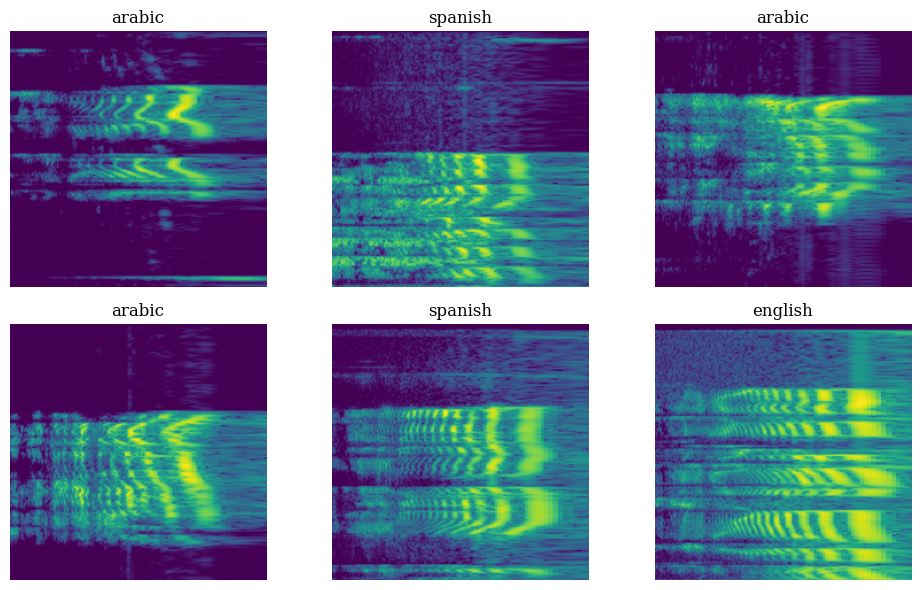

In [34]:
# Define the dataset path (Update if the path is different)
data_dir2 = Path("languages")
#data_dir2 = Path("/content/drive/MyDrive/ENDG_511_Lab2_Seleem_Badawy_Benjamin_Pele/data/radio_signal_identification/radio_signal_identification")

# List all spectrogram files in the directory
spectrogram_filenames = os.listdir(data_dir2)
# Number of spectrogram samples to visualize
num_samples = 6
# Randomly select 'num_samples' spectrogram files from the dataset
selected_files = sample(spectrogram_filenames, num_samples)

# Create a 2x3 grid for visualization
fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
# Iterate through selected files and plot spectrograms
for i, ax in enumerate(axes.ravel()):
    # Load spectrogram image
    spectrogram_path = os.path.join(data_dir2, selected_files[i])
    spectrogram = np.array(Image.open(spectrogram_path).convert("L").resize((224, 224))).T
    # Ensure the spectrogram has correct dimensions
    spectrogram = np.squeeze(spectrogram)
    # Display the spectrogram
    ax.imshow(spectrogram, cmap="viridis")  # Ensuring a grayscale colormap
    ax.set_title(selected_files[i].split('_')[0])  # Extract class label from filename
    ax.axis("off")  # Hide axes for better visualization

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [35]:
class LanguageDataset(Dataset):
    """
    A PyTorch Dataset class for loading and processing spectrogram images of radio signals.

    This dataset:
    - Loads images from a specified directory.
    - Applies preprocessing transformations (grayscale conversion, resizing, normalization).
    - Computes class weights for handling class imbalance.
    - Returns image tensors along with their respective labels.

    Attributes:
    ----------
    data_dir : str
        Path to the dataset directory.
    class_labels : list
        List of signal class names.
    class_weights : torch.Tensor
        Normalized inverse frequency weights for each class.
    data_files : list
        List of all image file names in the dataset.
    transform : torchvision.transforms.Compose
        Transformations applied to each image.
    """

    def __init__(self, data_dir):
        """
        Initializes the dataset by loading class names, computing class frequencies, and setting up transformations.

        Parameters:
        ----------
        data_dir : str
            Path to the dataset directory.
        """
        self.data_dir = data_dir

        # Define class labels (must match the dataset naming convention)
        self.class_labels = [ 'arabic', 'english', 'german', 'mandarin', 'spanish']

        # Get all filenames from the dataset directory
        self.data_files = os.listdir(data_dir)

        # Compute class frequencies (how many samples per class exist)
        class_counts = {label: sum(1 for file in self.data_files if file.startswith(label)) for label in self.class_labels}

        # Compute class weights (inverse frequency) to handle class imbalance
        total_samples = sum(class_counts.values())
        class_weights = [1 / (count / total_samples) if count > 0 else 0 for count in class_counts.values()]

        # Normalize class weights so they sum to 1
        class_weights_sum = sum(class_weights)
        self.class_weights = torch.tensor([w / class_weights_sum for w in class_weights], dtype=torch.float)

        # Define image transformations
        self.transform = Compose([
            ToTensor(),
            Grayscale(),
            Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
            Normalize(mean=[0.5], std=[0.5])
        ])

    def __getitem__(self, index):
        """
        Loads an image, applies transformations, and returns it along with its label index.

        Parameters:
        ----------
        index : int
            Index of the sample in the dataset.

        Returns:
        -------
        tuple(torch.Tensor, torch.Tensor)
            Transformed image tensor and its corresponding label index.
        """
        # Get the filename of the sample
        file_name = self.data_files[index]
        file_path = os.path.join(self.data_dir, file_name)

        # Load the image
        image = Image.open(file_path)

        # Rotate 90 degrees (optional, remove if unnecessary)
        image = image.transpose(Image.ROTATE_90)

        # Ensure the image is in RGB mode (some formats might be grayscale)
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Extract the class label from the filename
        class_label = file_name.split('_')[0]
        label_index = self.class_labels.index(class_label)

        # Apply transformations and return image with label
        return self.transform(image), torch.tensor(label_index, dtype=torch.long)

    def __len__(self):
        """
        Returns the total number of samples in the dataset.

        Returns:
        -------
        int
            Number of files in the dataset.
        """
        return len(self.data_files)


In [36]:
import torch
import torch_directml
torch.cuda.empty_cache()

In [ ]:
# Fixed parameters
task = 'languages'
task_type = "classification"

# Configurable parameters
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch_directml.device()
train_test_split = 0.8
batch_size = 64
num_workers = 0
frozen_blocks = 10#12  # Foundation Model Frozen Blocks (1 to 12)
label_smoothing = 0
lr = 1e-3#1e-2
weight_decay = 0.05
layer_decay = 0.75
model_size = 'small'
epochs = 15#10
warmup_epochs = 3#2#1
output_dir = 'models'

In [38]:
import sklearn
def stratified_split(dataset, train_test_split):
    """
    Implement a Stratified Split for an imbalanced dataset.

    Parameters:
    -----------
    dataset : Dataset
        The dataset to split.
    train_test_split : float
        The proportion of data to allocate for training.

    Returns:
    --------
    tuple : (train_dataset, test_dataset)
        The stratified training and validation datasets.
    """
    splitter = sklearn.model_selection.StratifiedShuffleSplit(train_size=train_test_split, random_state=None)

    labels_iterable = [dataset[i][1] for i in range(len(dataset))]

    for train_index, test_index in splitter.split(range(len(dataset)), labels_iterable):

            train_dataset = [dataset[i] for i in train_index]
            test_dataset = [dataset[i] for i in test_index]

    return train_dataset, test_dataset
    #raise NotImplementedError


In [41]:
# Load dataset
dataset = LanguageDataset(Path('languages'))  # Update path if needed

# Set random seed for reproducibility
seed = 42

# ⁉️Replace the line below with your stratified split implementation
dataset_train, dataset_val = random_split(dataset, [train_test_split, 1 - train_test_split],
                                          generator=torch.Generator().manual_seed(seed))

# Create dataloaders
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, num_workers=num_workers,
                               pin_memory=True, drop_last=True)
data_loader_val = DataLoader(dataset_val, batch_size=batch_size, num_workers=num_workers,
                             pin_memory=True, drop_last=False)

# Initialize Vision Transformer model based on size
if model_size == 'small':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=512, depth=12, num_heads=8,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=6)
elif model_size == 'medium':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=768, depth=12, num_heads=12,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=20)
elif model_size == 'large':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=1024, depth=24, num_heads=16,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=20)
else:
    raise ValueError('Model size must be either small, medium, or large')

# Load pretrained weights and freeze encoder blocks
checkpoint_path = Path('pretrained_small_75.pth')  # Update if needed
model.load_from_pretrained(checkpoint_path)
model.freeze_encoder(frozen_blocks)
model.to(device)

# Initialize optimizer
param_groups = param_groups_lrd(model, weight_decay, layer_decay=layer_decay)
optimizer = torch.optim.AdamW(param_groups, lr=lr)
loss_scaler = NativeScalerWithGradNormCount()

# Display model info
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model: {model}")
print(f"Number of parameters: {n_parameters / 1.e6:.2f}M")
print(f"Base learning rate: {lr * 256 / batch_size:.2e}")
print(f"Actual learning rate: {lr:.2e}")

# Define loss function
#criterion = nn.CrossEntropyLoss()
#print(f"Criterion: {criterion}")

criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device)) ## Fixes run time error
print(f"Criterion: {criterion}")

C:\Users\bpele\AppData\Local\Temp\ipykernel_4672\718117795.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location='cpu')


Model: VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(1, 512, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=512, out_features=1536, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=512, out_features=512, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=512, out_features=2048, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Id

C:\Users\bpele\AppData\Local\Temp\ipykernel_4672\4131671757.py:95: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self._scaler = torch.cuda.amp.GradScaler()


In [42]:
print(f"Starting training for {epochs} epochs...")

start_time = time.time()
max_accuracy = 0.0

for epoch in range(epochs):
    # Train for one epoch
    train_stats = train_one_epoch(model, criterion, data_loader_train, optimizer, device, epoch,
                                  warmup_epochs, lr, loss_scaler, task_type)

    # Save model checkpoint every 10 epochs
    #if output_dir and epoch % 10 == 0:
    #    model.save_model(os.path.join(output_dir, f'checkpoint-{epoch}.pth'))

    # Evaluate the model
    test_stats = evaluate(data_loader_val, model, criterion, device, task_type)

    # Log accuracy
    print(f"Accuracy on {len(dataset_val)} test samples: {test_stats['acc1']:.3f}%")
    max_accuracy = max(max_accuracy, test_stats["acc1"])
    print(f"Max accuracy so far: {max_accuracy:.3f}%")

#save model for submission
model.save_model(os.path.join(output_dir, f'model_sig_identification.pth'))
# Compute total training time
total_time = time.time() - start_time
total_time_str = str(datetime.timedelta(seconds=int(total_time)))
print(f"Total training time: {total_time_str}")

Starting training for 15 epochs...


C:\Users\bpele\AppData\Local\Temp\ipykernel_4672\3632039836.py:55: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


RuntimeError: Could not allocate tensor with 79480832 bytes. There is not enough GPU video memory available!

## Radio Signal Identification Dataset Class  

In this section, we define a custom PyTorch `RadioSignalDataset` class to efficiently handle data loading.  

PyTorch’s `Dataset` is an abstract class that allows us to create a structured way to load and preprocess data. We will implement a subclass that:  
- Reads and processes the dataset.  
- Applies necessary transformations (e.g., normalization, resizing, grayscale conversion).  
- Returns data samples and their corresponding labels for training and evaluation.  

This dataset class will be used with `torch.utils.data.DataLoader` to enable efficient batch processing and training of the model.

In [155]:
class RadioSignalDataset(Dataset):
    """
    A PyTorch Dataset class for loading and processing spectrogram images of radio signals.

    This dataset:
    - Loads images from a specified directory.
    - Applies preprocessing transformations (grayscale conversion, resizing, normalization).
    - Computes class weights for handling class imbalance.
    - Returns image tensors along with their respective labels.

    Attributes:
    ----------
    data_dir : str
        Path to the dataset directory.
    class_labels : list
        List of signal class names.
    class_weights : torch.Tensor
        Normalized inverse frequency weights for each class.
    data_files : list
        List of all image file names in the dataset.
    transform : torchvision.transforms.Compose
        Transformations applied to each image.
    """

    def __init__(self, data_dir):
        """
        Initializes the dataset by loading class names, computing class frequencies, and setting up transformations.

        Parameters:
        ----------
        data_dir : str
            Path to the dataset directory.
        """
        self.data_dir = data_dir

        # Define class labels (must match the dataset naming convention)
        self.class_labels = [
            'ads-b', 'airband', 'ais', 'automatic-picture-transmission', 'bluetooth', 'cellular',
            'digital-audio-broadcasting', 'digital-speech-decoder', 'fm', 'lora', 'morse', 'on-off-keying', 'packet', 'pocsag', 'Radioteletype', 'remote-keyless-entry', 'RS41-Radiosonde', 'sstv', 'vor', 'wifi'
        ]

        # Get all filenames from the dataset directory
        self.data_files = os.listdir(data_dir)

        # Compute class frequencies (how many samples per class exist)
        class_counts = {label: sum(1 for file in self.data_files if file.startswith(label)) for label in self.class_labels}

        # Compute class weights (inverse frequency) to handle class imbalance
        total_samples = sum(class_counts.values())
        class_weights = [1 / (count / total_samples) if count > 0 else 0 for count in class_counts.values()]

        # Normalize class weights so they sum to 1
        class_weights_sum = sum(class_weights)
        self.class_weights = torch.tensor([w / class_weights_sum for w in class_weights], dtype=torch.float)

        # Define image transformations
        self.transform = Compose([
            ToTensor(),
            Grayscale(),
            Resize((224, 224), interpolation=InterpolationMode.BICUBIC),
            Normalize(mean=[0.5], std=[0.5])
        ])

    def __getitem__(self, index):
        """
        Loads an image, applies transformations, and returns it along with its label index.

        Parameters:
        ----------
        index : int
            Index of the sample in the dataset.

        Returns:
        -------
        tuple(torch.Tensor, torch.Tensor)
            Transformed image tensor and its corresponding label index.
        """
        # Get the filename of the sample
        file_name = self.data_files[index]
        file_path = os.path.join(self.data_dir, file_name)

        # Load the image
        image = Image.open(file_path)

        # Rotate 90 degrees (optional, remove if unnecessary)
        image = image.transpose(Image.ROTATE_90)

        # Ensure the image is in RGB mode (some formats might be grayscale)
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Extract the class label from the filename
        class_label = file_name.split('_')[0]
        label_index = self.class_labels.index(class_label)

        # Apply transformations and return image with label
        return self.transform(image), torch.tensor(label_index, dtype=torch.long)

    def __len__(self):
        """
        Returns the total number of samples in the dataset.

        Returns:
        -------
        int
            Number of files in the dataset.
        """
        return len(self.data_files)


## Fine-Tuning for Radio Signal Identification  

Each fine-tuning section includes configurable parameters that you can modify as needed. Some of these settings will directly impact model performance, so choose them carefully.  

---

### **Fine-Tuning Configuration**  
The following configuration parameters define the training setup. You can modify them to experiment with different settings:  

- **`train_test_split`** *(default: `0.8`)* → Proportion of the dataset used for training. A lower value increases validation data.  
- **`batch_size`** *(default: `64`)* → Number of samples per batch. Larger values require more memory but speed up training.  
- **`num_workers`** *(default: `0`)* → Number of subprocesses for data loading. Increase for faster loading if using a powerful CPU.  
- **`frozen_blocks`** *(default: `12`)* → Number of transformer blocks to freeze. Reducing this allows more layers to be fine-tuned.  
- **`lr`** *(default: `1e-2`)* → Initial learning rate. Adjust based on convergence speed and loss stability.  
- **`weight_decay`** *(default: `0.05`)* → Regularization to prevent overfitting. Higher values reduce overfitting but may slow learning.  
- **`layer_decay`** *(default: `0.75`)* → Learning rate decay across layers. Lower values slow weight updates in deeper layers.  
- **`model_size`** *(default: `'small'`)* → Choose `'small'`, `'medium'`, or `'large'`. Larger models improve accuracy but require more resources.  
- **`epochs`** *(default: `50`)* → Total training epochs. Increase for better convergence, but training will take longer.  
- **`warmup_epochs`** *(default: `10`)* → Number of warm-up epochs with a gradually increasing learning rate. Helps stabilize early training.  
- **`output_dir`** *(default: `''`)* → Directory where model checkpoints will be saved. Leave empty to disable saving.  


In [156]:
import torch_directml

In [157]:
import torch
torch.cuda.empty_cache()

In [158]:
# Fixed parameters
task = 'radio_signal_identification'
task_type = "classification"

# Configurable parameters
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch_directml.device()
train_test_split = 0.8
batch_size = 64
num_workers = 0
frozen_blocks = 10#12  # Foundation Model Frozen Blocks (1 to 12)
label_smoothing = 0
lr = 1e-3#1e-2
weight_decay = 0.05
layer_decay = 0.75
model_size = 'small'
epochs = 15#10
warmup_epochs = 3#2#1
output_dir = 'submit_models'

### Fine-tuning Code

### ⚙️ **Subtask 1:**  
Implement a **Stratified Split** instead of the current standard split.

Since this dataset is **imbalanced**, a stratified split ensures that class distributions are preserved in both training and test sets, leading to more reliable model performance.

In [159]:
import sklearn
def stratified_split(dataset, train_test_split):
    """
    Implement a Stratified Split for an imbalanced dataset.

    Parameters:
    -----------
    dataset : Dataset
        The dataset to split.
    train_test_split : float
        The proportion of data to allocate for training.

    Returns:
    --------
    tuple : (train_dataset, test_dataset)
        The stratified training and validation datasets.
    """
    splitter = sklearn.model_selection.StratifiedShuffleSplit(train_size=train_test_split, random_state=None)

    labels_iterable = [dataset[i][1] for i in range(len(dataset))]

    for train_index, test_index in splitter.split(range(len(dataset)), labels_iterable):

            train_dataset = [dataset[i] for i in train_index]
            test_dataset = [dataset[i] for i in test_index]

    return train_dataset, test_dataset
    #raise NotImplementedError


### ⚙️ **Subtask 2: Use Weighted Cross-Entropy Loss**  

Since the dataset is **imbalanced**, using standard cross-entropy loss may cause the model to be biased toward majority classes. To handle this, you need to **use weighted cross-entropy loss**, where class weights adjust the impact of each class based on its frequency.  

#### **Why Use Weighted Loss?**  
- Ensures that underrepresented classes contribute more to the loss, preventing the model from ignoring them.  
- Helps achieve a more balanced performance across all classes.  

#### **What You Need to Do:**  
Modify the loss function by incorporating **class weights** from the dataset. The class weights are already computed and available as `dataset.class_weights`. You need to pass these weights to `torch.nn.CrossEntropyLoss()`.  

#### **Hint:**  
Modify the loss function definition in the fine-tuning code:  

Replace this line:  
```python
criterion = nn.CrossEntropyLoss()
```


## Dataset Preparation and Model Initialization

In [160]:
# Load dataset
dataset = RadioSignalDataset(Path('data/radio_signal_identification/radio_signal_identification'))  # Update path if needed

# Set random seed for reproducibility
seed = 42

# ⁉️Replace the line below with your stratified split implementation
dataset_train, dataset_val = random_split(dataset, [train_test_split, 1 - train_test_split],
                                          generator=torch.Generator().manual_seed(seed))

# Create dataloaders
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, num_workers=num_workers,
                               pin_memory=True, drop_last=True)
data_loader_val = DataLoader(dataset_val, batch_size=batch_size, num_workers=num_workers,
                             pin_memory=True, drop_last=False)

# Initialize Vision Transformer model based on size
if model_size == 'small':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=512, depth=12, num_heads=8,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=20)
elif model_size == 'medium':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=768, depth=12, num_heads=12,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=20)
elif model_size == 'large':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=1024, depth=24, num_heads=16,
                              mlp_ratio=4, qkv_bias=True, in_chans=1,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=20)
else:
    raise ValueError('Model size must be either small, medium, or large')

# Load pretrained weights and freeze encoder blocks
checkpoint_path = Path('data/pretrained_small_75.pth')  # Update if needed
model.load_from_pretrained(checkpoint_path)
model.freeze_encoder(frozen_blocks)
model.to(device)

# Initialize optimizer
param_groups = param_groups_lrd(model, weight_decay, layer_decay=layer_decay)
optimizer = torch.optim.AdamW(param_groups, lr=lr)
loss_scaler = NativeScalerWithGradNormCount()

# Display model info
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model: {model}")
print(f"Number of parameters: {n_parameters / 1.e6:.2f}M")
print(f"Base learning rate: {lr * 256 / batch_size:.2e}")
print(f"Actual learning rate: {lr:.2e}")

# Define loss function
#criterion = nn.CrossEntropyLoss()
#print(f"Criterion: {criterion}")

criterion = nn.CrossEntropyLoss(weight=dataset.class_weights.to(device)) ## Fixes run time error
print(f"Criterion: {criterion}")

C:\Users\bpele\AppData\Local\Temp\ipykernel_11728\2992360398.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location='cpu')
C:\Users

Model: VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(1, 512, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=512, out_features=1536, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=512, out_features=512, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=512, out_features=2048, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Id

## Start Finetuning

In [161]:
print(f"Starting training for {epochs} epochs...")

start_time = time.time()
max_accuracy = 0.0

for epoch in range(epochs):
    # Train for one epoch
    train_stats = train_one_epoch(model, criterion, data_loader_train, optimizer, device, epoch,
                                  warmup_epochs, lr, loss_scaler, task_type)

    # Save model checkpoint every 10 epochs
    #if output_dir and epoch % 10 == 0:
    #    model.save_model(os.path.join(output_dir, f'checkpoint-{epoch}.pth'))

    # Evaluate the model
    test_stats = evaluate(data_loader_val, model, criterion, device, task_type)

    # Log accuracy
    print(f"Accuracy on {len(dataset_val)} test samples: {test_stats['acc1']:.3f}%")
    max_accuracy = max(max_accuracy, test_stats["acc1"])
    print(f"Max accuracy so far: {max_accuracy:.3f}%")

#save model for submission
model.save_model(os.path.join(output_dir, f'model_sig_identification.pth'))
# Compute total training time
total_time = time.time() - start_time
total_time_str = str(datetime.timedelta(seconds=int(total_time)))
print(f"Total training time: {total_time_str}")

Starting training for 15 epochs...


C:\Users\bpele\AppData\Local\Temp\ipykernel_11728\3632039836.py:55: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch: [0]  [ 0/36]  eta: 0:06:03  lr: 0.000000  loss: 2.9957 (2.9957)  acc1: 6.2500 (6.2500)  acc3: 9.3750 (9.3750)  time: 10.0944  data: 1.2224
Epoch: [0]  [20/36]  eta: 0:02:45  lr: 0.000185  loss: 2.9606 (2.9589)  acc1: 10.9375 (12.7232)  acc3: 31.2500 (28.4970)  time: 10.3541  data: 0.8329
Epoch: [0]  [35/36]  eta: 0:00:10  lr: 0.000324  loss: 2.7205 (2.8448)  acc1: 23.4375 (17.7083)  acc3: 43.7500 (35.5035)  time: 10.2042  data: 0.7146
Epoch: [0] Total time: 0:06:09 (10.2647 s / it)
Averaged stats: lr: 0.000324  loss: 2.7205 (2.8448)  acc1: 23.4375 (17.7083)  acc3: 43.7500 (35.5035)


C:\Users\bpele\AppData\Local\Temp\ipykernel_11728\3632039836.py:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Test:  [ 0/10]  eta: 0:00:39  loss: 2.5873 (2.5873)  acc1: 18.7500 (18.7500)  acc3: 40.6250 (40.6250)  time: 3.9814  data: 0.8779
Test:  [ 9/10]  eta: 0:00:03  loss: 2.4668 (2.4531)  acc1: 20.3125 (21.1438)  acc3: 43.7500 (44.1941)  time: 3.4622  data: 0.6634
Test: Total time: 0:00:34 (3.4623 s / it)
* Acc@1 21.144 Acc@3 44.194 loss 2.453
Accuracy on 577 test samples: 21.144%
Max accuracy so far: 21.144%
Epoch: [1]  [ 0/36]  eta: 0:06:12  lr: 0.000333  loss: 2.5097 (2.5097)  acc1: 21.8750 (21.8750)  acc3: 51.5625 (51.5625)  time: 10.3411  data: 0.7279
Epoch: [1]  [20/36]  eta: 0:02:44  lr: 0.000519  loss: 2.1562 (2.1834)  acc1: 26.5625 (27.9018)  acc3: 51.5625 (52.6042)  time: 10.3066  data: 0.7219
Epoch: [1]  [35/36]  eta: 0:00:10  lr: 0.000657  loss: 1.8718 (2.0571)  acc1: 29.6875 (29.1667)  acc3: 56.2500 (53.6892)  time: 10.2356  data: 0.7134
Epoch: [1] Total time: 0:06:10 (10.2800 s / it)
Averaged stats: lr: 0.000657  loss: 1.8718 (2.0571)  acc1: 29.6875 (29.1667)  acc3: 56.2500 (5

### ⚙️ **Subtask 3: Detailed Performance Evaluation**  

Since this is a **classification task**, we will assess model performance using **confusion matrices**.  

**What to Do:**  
Use the evaluation code from the **Human Activity Sensing** task as a reference to implement the **evaluation** for this task.  

**Hint:**  
You can retrieve class names from the `RadioSignalDataset` class using:  
```python
class_names = dataset.labels
```

## **Target Performance Goal:** Achieve at least 80% validation accuracy.  

**Experiment with configuration parameters** (e.g., learning rate, batch size, frozen layers) to optimize performance.


Processing Validation Batches: 100%|██████████| 10/10 [00:34<00:00,  3.41s/it]


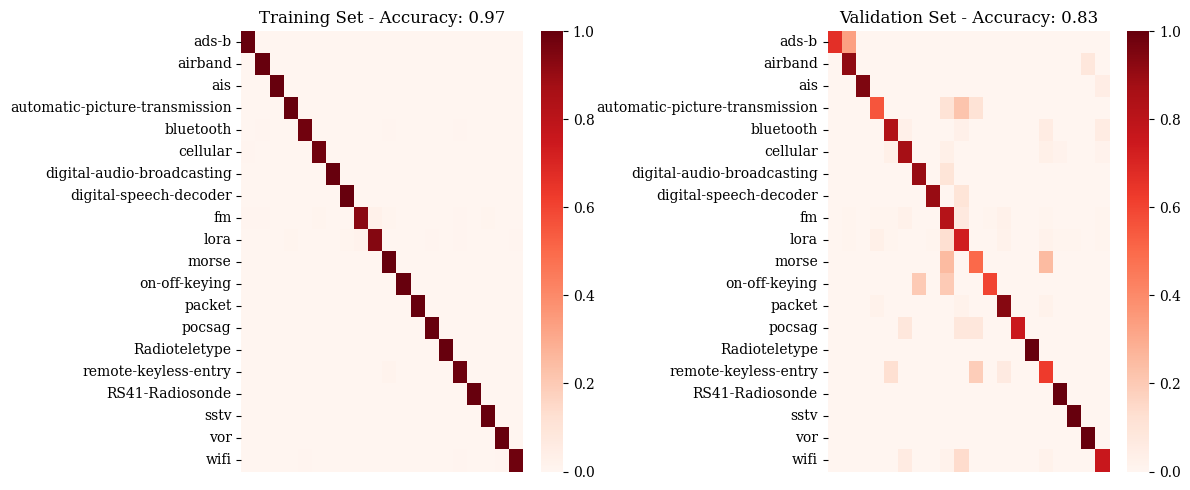

In [162]:
# Define class names for labeling confusion matrices
class_names = dataset.class_labels

# -------------------------
# 📌 Compute Predictions on Training Data
# -------------------------
all_labels_train = []
all_preds_train = []

with torch.no_grad():
    for samples, targets in tqdm(data_loader_train, desc='Processing Training Batches'):
        samples, targets = samples.to(device), targets.to(device)
        output = model(samples)  # Forward pass
        all_preds_train.extend(output.argmax(dim=-1).cpu().numpy())  # Get predicted class
        all_labels_train.extend(targets.cpu().numpy())  # Store true labels

# -------------------------
# 📌 Compute Predictions on Validation Data
# -------------------------
all_labels_val = []
all_preds_val = []

with torch.no_grad():
    for samples, targets in tqdm(data_loader_val, desc='Processing Validation Batches'):
        samples, targets = samples.to(device), targets.to(device)
        output = model(samples)  # Forward pass
        all_preds_val.extend(output.argmax(dim=-1).cpu().numpy())  # Get predicted class
        all_labels_val.extend(targets.cpu().numpy())  # Store true labels

# -------------------------
# 📌 Compute Confusion Matrices
# -------------------------
conf_mat_train = confusion_matrix(all_labels_train, all_preds_train)
conf_mat_val = confusion_matrix(all_labels_val, all_preds_val)

# Compute accuracy
accuracy_train = np.trace(conf_mat_train) / np.sum(conf_mat_train)  # Correct predictions / total
accuracy_val = np.trace(conf_mat_val) / np.sum(conf_mat_val)

# Convert to float for normalization
conf_mat_train = conf_mat_train.astype(np.float32)
conf_mat_val = conf_mat_val.astype(np.float32)

# Normalize confusion matrices by row (i.e., per-class normalization)
for i in range(len(class_names)):
    conf_mat_train[i] /= np.sum(conf_mat_train[i])  # Normalize training confusion matrix
    conf_mat_val[i] /= np.sum(conf_mat_val[i])  # Normalize val confusion matrix

# -------------------------
# 📌 Plot Confusion Matrices
# -------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Create side-by-side subplots

# Plot Training Confusion Matrix
sns.heatmap(conf_mat_train, cmap='Reds', yticklabels=class_names, ax=axs[0])
axs[0].set_title(f'Training Set - Accuracy: {accuracy_train:.2f}')
axs[0].tick_params(axis='y', labelsize=10)
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Plot Test Confusion Matrix
sns.heatmap(conf_mat_val, cmap='Reds', yticklabels=class_names, ax=axs[1])
axs[1].set_title(f'Validation Set - Accuracy: {accuracy_val:.2f}')
axs[1].tick_params(axis='y', labelsize=10)
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Adjust layout for better readability
plt.tight_layout()
plt.savefig(Path('conf_radio_signal.png'), dpi=400)  # Save figure
plt.show()

# ⚙️ **Fine-Tuning Task 3:** 5G CSI-Based Positioning Task  

This dataset contains **CSI measurements** from 5G **sounding reference signals** exchanged between a user device (UE) and four **4×4 MIMO base stations**. The task is to predict the UE's position based on its CSI.

![Positioning](https://drive.google.com/uc?export=view&id=1_7HR_BnN0FxL8o0sBlSq3Oe4vrdYc4xo)

**Source:** K. Gao, H. Wang, H. Lv and W. Liu, "Toward 5G NR High-Precision Indoor Positioning via Channel Frequency Response: A New Paradigm and Dataset Generation Method," in IEEE Journal on Selected Areas in Communications, vol. 40, no. 7, pp. 2233-2247, July 2022, doi: 10.1109/JSAC.2022.3157397

In [10]:
!ls /content/drive/

MyDrive


## Data Visualization

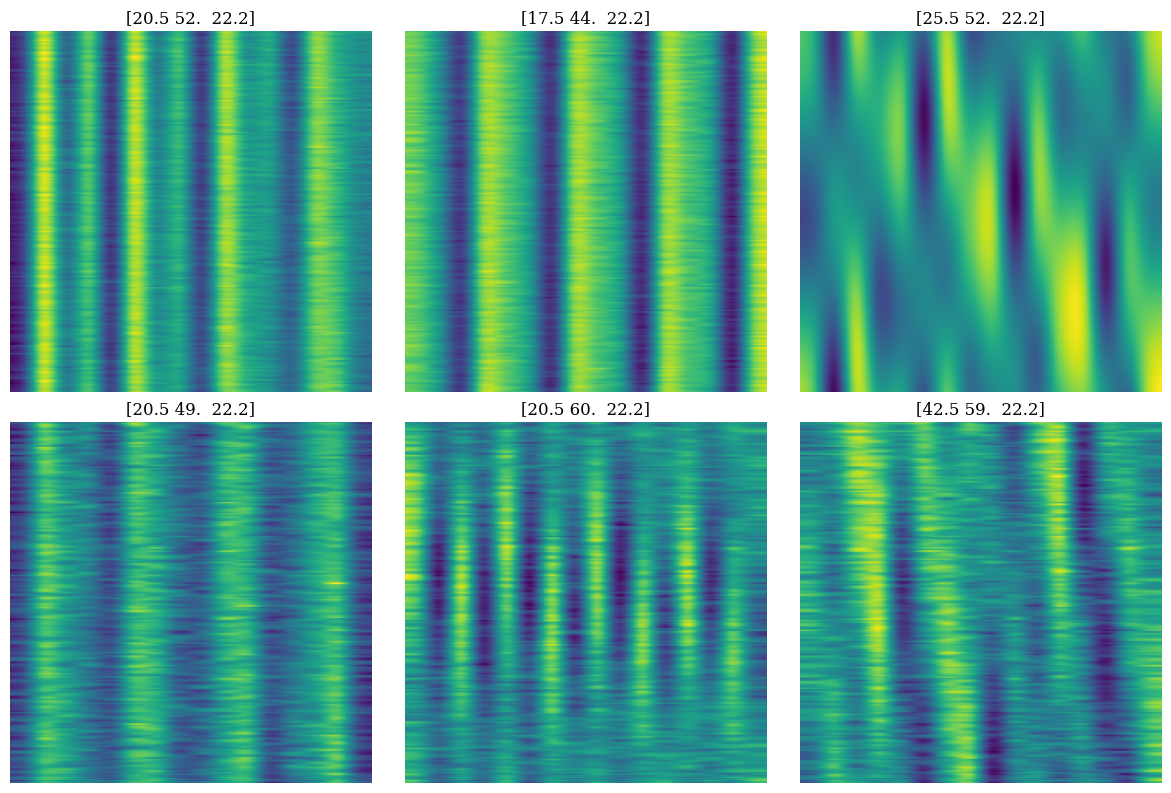

In [14]:
# Define dataset path (Update if the path is different)
data_dir = Path("data/5g_positioning/5g_positioning")
#data_dir = Path("/content/drive/MyDrive/ENDG_511_Lab2_Seleem_Badawy_Benjamin_Pele/data/5g_positioning/5g_positioning")

# List all spectrogram files in the directory
csi_filenames = os.listdir(data_dir)

# Number of samples to visualize
num_samples = 6

# Randomly select 'num_samples' files from the dataset
selected_files = sample(csi_filenames, num_samples)

# Create a 2x3 grid for visualization
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

# Iterate through selected files and plot spectrograms
for i, ax in enumerate(axes.ravel()):
    # Load spectrogram image
    sample_path = data_dir / selected_files[i]
    with h5py.File(sample_path, 'r') as sample_file:
        features = np.array(sample_file['features'])
        position = np.array(sample_file['position'])

    # Convert to PIL image (transposing to match image dimensions)
    csi_image = Image.fromarray(features[0].T)

    # Resize image to (224, 224) for better visualization
    csi_resized = np.array(csi_image.resize((224, 224), Image.BICUBIC))

    # Display the spectrogram
    ax.imshow(csi_resized, cmap="viridis")  # Use a perceptually uniform colormap
    ax.set_title(position)  # Extract class label from filename
    ax.axis("off")  # Hide axes for cleaner visualization

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## 5G Positioning Dataset Class  


In [15]:
class Positioning5G(Dataset):
    """
    A PyTorch Dataset for 5G NR-based positioning.

    This dataset:
    - Loads CSI (Channel State Information) features from `.h5` files.
    - Normalizes and transforms features for model training.
    - Converts position labels to a normalized range [-1, 1].
    - Supports both 'outdoor' and 'indoor' positioning scenarios.

    Parameters:
    ----------
    datapath : str or Path
        Path to the dataset directory containing `.h5` files.
    img_size : tuple, default=(224, 224)
        Target image size for resizing.
    scene : str, default='outdoor'
        Specifies whether to load 'outdoor' or 'indoor' scene data.

    Raises:
    -------
    ValueError
        If the specified scene is not recognized.
    """

    def __init__(self, datapath, img_size=(224, 224), scene='outdoor'):
        self.img_size = img_size
        self.scene = scene

        # Get list of all `.h5` files for the specified scene
        self.data_files = [os.path.join(datapath, filename) for filename in os.listdir(datapath)
        ]
        self.num_samples = len(self.data_files)

        # Define scene-specific normalization parameters
        if scene == 'outdoor':
            self.min_val, self.max_val = -0.096, 1.136
            self.mu = torch.as_tensor([0.4638, 0.4631, 0.4703, 0.4620])
            self.std = torch.as_tensor([0.1154, 0.1176, 0.0979, 0.1281])
            self.coord_nominal_min = torch.as_tensor([0, 0, 0], dtype=torch.float16)
            self.coord_nominal_max = torch.as_tensor([80, 60, 40], dtype=torch.float16)

        elif scene == 'indoor':
            self.min_val, self.max_val = -0.123, 1.415
            self.mu = torch.as_tensor([0.3824, 0.3853, 0.3841, 0.3931, 0.3909])
            self.std = torch.as_tensor([0.1168, 0.1112, 0.1182, 0.0988, 0.0972])
            self.coord_nominal_min = torch.as_tensor([0, 0, 0], dtype=torch.float16)
            self.coord_nominal_max = torch.as_tensor([60, 20, 4], dtype=torch.float16)

        else:
            raise ValueError("Scene not recognized. Choose either 'outdoor' or 'indoor'.")

        # Define transformations for feature preprocessing
        self.transforms = Compose([
            Lambda(lambda x: torch.as_tensor(x, dtype=torch.float32)),  # Convert to PyTorch tensor
            Resize(self.img_size, antialias=True, interpolation=InterpolationMode.BICUBIC),  # Resize feature maps
            Lambda(lambda x: (x - self.min_val) / (self.max_val - self.min_val)),  # Min-max normalization
            Normalize(self.mu, self.std)  # Standardization
        ])

    def __getitem__(self, index):
        """
        Loads and preprocesses a sample.

        Parameters:
        ----------
        index : int
            Index of the sample to retrieve.

        Returns:
        -------
        tuple : (torch.Tensor, torch.Tensor)
            Processed CSI feature tensor and normalized position label.
        """
        # Load features and labels from an `.h5` file
        with h5py.File(self.data_files[index], 'r') as data_file:
            features = np.array(data_file['features'])  # CSI feature map
            labels = torch.as_tensor(np.array(data_file['position']), dtype=torch.float)  # Position label

        # Normalize position labels to range [-1, 1]
        labels = 2 * (labels - self.coord_nominal_min) / (self.coord_nominal_max - self.coord_nominal_min) - 1

        # Apply transformations to features
        features = self.transforms(features)

        return features, labels

    def __len__(self):
        """
        Returns the total number of samples in the dataset.

        Returns:
        -------
        int
            Total number of samples.
        """
        return self.num_samples

## Fine-Tuning for 5G Positioning

Each fine-tuning section includes configurable parameters that you can modify as needed. Some of these settings will directly impact model performance, so choose them carefully.  

---

### **Fine-Tuning Configuration**  
The following configuration parameters define the training setup. You can modify them to experiment with different settings:  

- **`train_test_split`** *(default: `0.8`)* → Proportion of the dataset used for training. A lower value increases validation data.  
- **`batch_size`** *(default: `64`)* → Number of samples per batch. Larger values require more memory but speed up training.  
- **`num_workers`** *(default: `0`)* → Number of subprocesses for data loading. Increase for faster loading if using a powerful CPU.  
- **`frozen_blocks`** *(default: `12`)* → Number of transformer blocks to freeze. Reducing this allows more layers to be fine-tuned.  
- **`lr`** *(default: `1e-2`)* → Initial learning rate. Adjust based on convergence speed and loss stability.  
- **`weight_decay`** *(default: `0.05`)* → Regularization to prevent overfitting. Higher values reduce overfitting but may slow learning.  
- **`layer_decay`** *(default: `0.75`)* → Learning rate decay across layers. Lower values slow weight updates in deeper layers.  
- **`model_size`** *(default: `'small'`)* → Choose `'small'`, `'medium'`, or `'large'`. Larger models improve accuracy but require more resources.  
- **`epochs`** *(default: `50`)* → Total training epochs. Increase for better convergence, but training will take longer.  
- **`warmup_epochs`** *(default: `10`)* → Number of warm-up epochs with a gradually increasing learning rate. Helps stabilize early training.  
- **`output_dir`** *(default: `''`)* → Directory where model checkpoints will be saved. Leave empty to disable saving.  


In [165]:
import torch
import torch_directml
dml = torch_directml.device()


In [166]:
import torch
torch.cuda.empty_cache()


In [167]:
# Fixed parameters
task = 'positioning'
task_type = "regression"

# Configurable parameters
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch_directml.device()
train_test_split = 0.8
batch_size = 32#64
num_workers = 0
frozen_blocks = 1#12  # Foundation Model Frozen Blocks (1 to 12)
label_smoothing = 0.1#0
lr = 1e-3#5e-4#1e-2
weight_decay = 0.02#0.05
layer_decay = 0.8#0.75
model_size = 'small'
epochs = 50#20#10
warmup_epochs = 5#3#1
output_dir = 'submit_models'

## Dataset Preparation and Model Initialization

In [168]:
# Load dataset
dataset = Positioning5G(Path('data/5g_positioning/5g_positioning'))  # Update path if needed
#dataset = Positioning5G(Path('/content/drive/MyDrive/ENDG_511_Lab2_Seleem_Badawy_Benjamin_Pele/data/5g_positioning/5g_positioning'))  # Update path if needed

# Set random seed for reproducibility
seed = 42
dataset_train, dataset_val = random_split(dataset, [train_test_split, 1 - train_test_split],
                                          generator=torch.Generator().manual_seed(seed))

# Create dataloaders
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, num_workers=num_workers,
                               pin_memory=True, drop_last=True)
data_loader_val = DataLoader(dataset_val, batch_size=batch_size, num_workers=num_workers,
                             pin_memory=True, drop_last=False)

# Initialize Vision Transformer model based on size
if model_size == 'small':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=512, depth=12, num_heads=8,
                              mlp_ratio=4, qkv_bias=True, in_chans=4,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=3, tanh=True)
elif model_size == 'medium':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=768, depth=12, num_heads=12,
                              mlp_ratio=4, qkv_bias=True, in_chans=4,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=3, tanh=True)
elif model_size == 'large':
    model = VisionTransformer(task=task, patch_size=16, embed_dim=1024, depth=24, num_heads=16,
                              mlp_ratio=4, qkv_bias=True, in_chans=4,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=3, tanh=True)
else:
    raise ValueError('Model size must be either small, medium, or large')

# Load pretrained weights and freeze encoder blocks
checkpoint_path = Path('data/pretrained_small_75.pth')  # Update if needed
#checkpoint_path = Path('/content/drive/MyDrive/ENDG_511_Lab2_Seleem_Badawy_Benjamin_Pele/data/pretrained_small_75.pth')  # Update if needed
#checkpoint_path = Path('/content/drive/MyDrive/ENDG_511_Lab2_Seleem_Badawy_Benjamin_Pele/data/pretrained_medium_75.pth')
model.load_from_pretrained(checkpoint_path)
model.freeze_encoder(frozen_blocks)
model.to(device)
#model = model.half()
# Initialize optimizer
param_groups = param_groups_lrd(model, weight_decay, layer_decay=layer_decay)
optimizer = torch.optim.AdamW(param_groups, lr=lr)
loss_scaler = NativeScalerWithGradNormCount()

# Display model info
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model: {model}")
print(f"Number of parameters: {n_parameters / 1.e6:.2f}M")
print(f"Base learning rate: {lr * 256 / batch_size:.2e}")
print(f"Actual learning rate: {lr:.2e}")

# Define loss function
criterion = nn.MSELoss()
print(f"Criterion: {criterion}")

C:\Users\bpele\AppData\Local\Temp\ipykernel_11728\2992360398.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location='cpu')


Model: VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(4, 512, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=512, out_features=1536, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=512, out_features=512, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=512, out_features=2048, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Id

C:\Users\bpele\AppData\Local\Temp\ipykernel_11728\4131671757.py:95: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self._scaler = torch.cuda.amp.GradScaler()
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


## Start Finetuning

In [169]:
print(f"Starting training for {epochs} epochs...")

start_time = time.time()
max_accuracy = 0.0
min_error = math.inf

for epoch in range(epochs):
    # Train for one epoch
    train_stats = train_one_epoch(model, criterion, data_loader_train, optimizer, device, epoch,
                                  warmup_epochs, lr, loss_scaler, task_type)

    # Save model checkpoint every 10 epochs
    #if output_dir and epoch % 10 == 0:
    #    model.save_model(os.path.join(output_dir, f'checkpoint-{epoch}.pth'))

    # Evaluate the model
    test_stats = evaluate(data_loader_val, model, criterion, device, task_type)

    # Log accuracy
    print(f"Error on {len(dataset_val)} test samples: {test_stats['loss']:.3f}%")
    min_error = min(min_error, test_stats["loss"])
    print(f"Min error so far: {min_error:.3f}")

#save model for submission
model.save_model(os.path.join(output_dir, f'model_positioning.pth'))
# Compute total training time
total_time = time.time() - start_time
total_time_str = str(datetime.timedelta(seconds=int(total_time)))
print(f"Total training time: {total_time_str}")

C:\Users\bpele\AppData\Local\Temp\ipykernel_11728\3632039836.py:55: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Starting training for 50 epochs...
Epoch: [0]  [  0/165]  eta: 0:08:34  lr: 0.000000  loss: 0.2123 (0.2123)  time: 3.1196  data: 0.0410
Epoch: [0]  [ 20/165]  eta: 0:09:25  lr: 0.000024  loss: 0.2069 (0.2061)  time: 3.9385  data: 0.0389
Epoch: [0]  [ 40/165]  eta: 0:08:12  lr: 0.000048  loss: 0.1081 (0.1597)  time: 3.9871  data: 0.0394
Epoch: [0]  [ 60/165]  eta: 0:06:50  lr: 0.000073  loss: 0.0324 (0.1185)  time: 3.8541  data: 0.0388
Epoch: [0]  [ 80/165]  eta: 0:05:33  lr: 0.000097  loss: 0.0223 (0.0947)  time: 3.9484  data: 0.0392
Epoch: [0]  [100/165]  eta: 0:04:13  lr: 0.000121  loss: 0.0188 (0.0796)  time: 3.8345  data: 0.0401
Epoch: [0]  [120/165]  eta: 0:02:54  lr: 0.000145  loss: 0.0141 (0.0688)  time: 3.7847  data: 0.0395
Epoch: [0]  [140/165]  eta: 0:01:36  lr: 0.000170  loss: 0.0125 (0.0607)  time: 3.8451  data: 0.0394
Epoch: [0]  [160/165]  eta: 0:00:19  lr: 0.000194  loss: 0.0106 (0.0544)  time: 3.8792  data: 0.0393
Epoch: [0]  [164/165]  eta: 0:00:03  lr: 0.000199  loss:

C:\Users\bpele\AppData\Local\Temp\ipykernel_11728\3632039836.py:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Test:  [ 0/42]  eta: 0:00:50  loss: 0.0104 (0.0104)  time: 1.2046  data: 0.0370
Test:  [10/42]  eta: 0:00:42  loss: 0.0107 (0.0107)  time: 1.3427  data: 0.0379
Test:  [20/42]  eta: 0:00:29  loss: 0.0104 (0.0107)  time: 1.3584  data: 0.0381
Test:  [30/42]  eta: 0:00:16  loss: 0.0103 (0.0106)  time: 1.3587  data: 0.0376
Test:  [40/42]  eta: 0:00:02  loss: 0.0106 (0.0106)  time: 1.3576  data: 0.0379
Test:  [41/42]  eta: 0:00:01  loss: 0.0106 (0.0105)  time: 1.2962  data: 0.0367
Test: Total time: 0:00:55 (1.3288 s / it)
* Loss 0.011
Error on 1321 test samples: 0.011%
Min error so far: 0.011
Epoch: [1]  [  0/165]  eta: 0:11:03  lr: 0.000200  loss: 0.0104 (0.0104)  time: 4.0191  data: 0.0420
Epoch: [1]  [ 20/165]  eta: 0:09:23  lr: 0.000224  loss: 0.0091 (0.0098)  time: 3.8807  data: 0.0384
Epoch: [1]  [ 40/165]  eta: 0:08:02  lr: 0.000248  loss: 0.0089 (0.0096)  time: 3.8310  data: 0.0384
Epoch: [1]  [ 60/165]  eta: 0:06:44  lr: 0.000273  loss: 0.0090 (0.0095)  time: 3.8487  data: 0.0387
Ep

## **Detailed Performance Evaluation**  

Since this is a **regression task**, we evaluate model performance using **Mean Squared Error (MSE) for positioning**.  

**What This Code Does:**  
- Computes the **positioning error** by comparing predicted positions to ground truth values.  
- Uses **Mean Squared Error (MSE)** as the primary metric.  
- Plots a **histogram** to visualize the **distribution of errors** across the dataset.  

**Why is this important?**  
- A well-performing model should have **lower error values** concentrated near zero.  
- The histogram helps identify **outliers** and **patterns in prediction errors**.  

## Run the code below to analyze your model’s performance!
## **Target Performance Goal:** Achieve a mean positioning error of ≤ 2 meters.



Processing Test Batches: 100%|██████████| 42/42 [00:51<00:00,  1.23s/it]


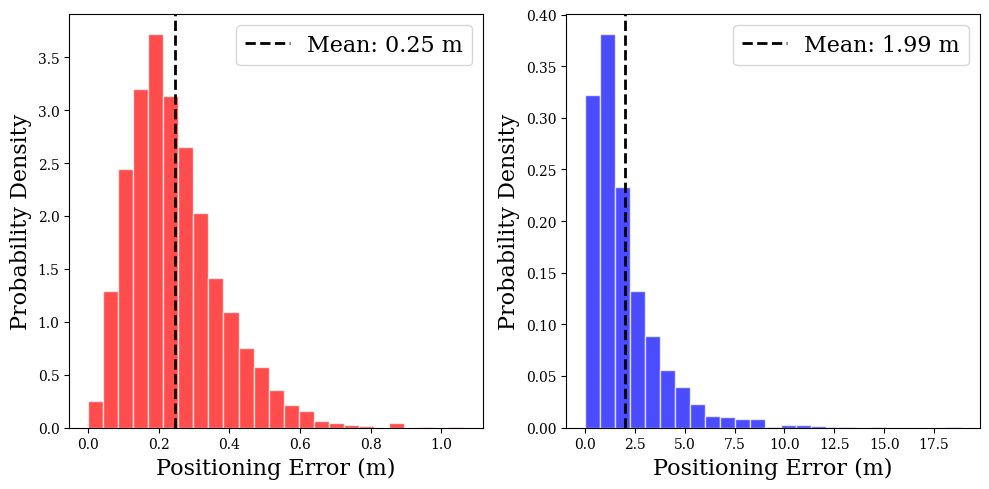

In [170]:
def reverse_normalize(x, coord_min, coord_max):
    """
    Reverse the normalization applied to coordinates.

    Parameters:
    ----------
    x : torch.Tensor
        Normalized coordinates in the range [-1, 1].
    coord_min : torch.Tensor
        Minimum coordinate values.
    coord_max : torch.Tensor
        Maximum coordinate values.

    Returns:
    -------
    torch.Tensor
        Denormalized coordinates in the original range.
    """
    return (x + 1) / 2 * (coord_max - coord_min) + coord_min

# Retrieve coordinate normalization bounds
coord_min = dataset.coord_nominal_min
coord_max = dataset.coord_nominal_max

# Move model to device
model = model.to(device)

# ------------------------
# 📌 Compute Positioning Errors for Training Data
# ------------------------
distances_train = torch.zeros(len(dataset_train))

with torch.no_grad():
    for i, batch in tqdm(enumerate(data_loader_train), desc="Processing Train Batches", total=len(data_loader_train)):
        images, targets = batch
        images = images.to(device)

        # Predict positions and reverse normalization
        pred_positions = reverse_normalize(model(images).cpu(), coord_min, coord_max)
        true_positions = reverse_normalize(targets.cpu(), coord_min, coord_max)

        num_samples = targets.shape[0]
        start_idx, end_idx = i * num_samples, (i + 1) * num_samples

        # Compute Euclidean distance between predicted and actual positions
        distances_train[start_idx:end_idx] = torch.sqrt(torch.sum((pred_positions - true_positions) ** 2, dim=1))

# ------------------------
# 📌 Compute Positioning Errors for Test Data
# ------------------------
distances_test = torch.zeros(len(dataset_val))

with torch.no_grad():
    for i, batch in tqdm(enumerate(data_loader_val), desc="Processing Test Batches", total=len(data_loader_val)):
        images, targets = batch
        images = images.to(device)

        # Predict positions and reverse normalization
        pred_positions = reverse_normalize(model(images).cpu(), coord_min, coord_max)
        true_positions = reverse_normalize(targets.cpu(), coord_min, coord_max)

        num_samples = targets.shape[0]
        start_idx, end_idx = i * num_samples, (i + 1) * num_samples

        # Compute Euclidean distance between predicted and actual positions
        distances_test[start_idx:end_idx] = torch.sqrt(torch.sum((pred_positions - true_positions) ** 2, dim=1))

# Convert to NumPy arrays for visualization
distances_train = distances_train.numpy()
distances_test = distances_test.numpy()

# ------------------------
# 📌 Plot Positioning Error Distributions
# ------------------------
plt.rcParams["font.family"] = "serif"

# Compute mean errors
mean_train = np.mean(distances_train)
mean_test = np.mean(distances_test)

# Set up histogram plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bins = 25

# Training Error Histogram
axs[0].hist(distances_train, bins=bins, color="red", edgecolor="w", alpha=0.7, density=True)
axs[0].axvline(mean_train, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_train:.2f} m")
axs[0].set_xlabel("Positioning Error (m)", fontsize=16)
axs[0].set_ylabel("Probability Density", fontsize=16)
axs[0].legend(fontsize=16)

# Test Error Histogram
axs[1].hist(distances_test, bins=bins, color="blue", edgecolor="w", alpha=0.7, density=True)
axs[1].axvline(mean_test, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_test:.2f} m")
axs[1].set_xlabel("Positioning Error (m)", fontsize=16)
axs[1].set_ylabel("Probability Density", fontsize=16)
axs[1].legend(fontsize=16)

# Final layout and save
plt.tight_layout()
plt.savefig("hist_positioning.png", dpi=300)
plt.show()

# ⚙️ **Fine-Tuning Task 4: Enhance the Regression Head & Fine-Tune for Positioning**

The current model uses a **single-layer regression head**. Your task is to **replace it with a multi-layer head** that includes **nonlinear activations**. This can improve the model’s ability to learn complex positional relationships.

#### **What to Do**

1. **Modify the `VisionTransformer` class by subclassing it** or by introducing parameters to control your task head.
2. Replace `self.head` with a **multi-layer MLP head** that includes:
   - **Fully connected layers**
   - **Nonlinear activations** (e.g., ReLU, GELU)
   - **Dropout (optional, but recommended)**
3. **Fine-tune the model only for the 5G Positioning task** using the best hyperparameter setup identified earlier.

#### **Hints**

- Modify `__init__()` to define a multi-layer MLP head using `torch.nn.Sequential()`.
- Another approach is to **modify `VisionTransformer`** and introduce parameters that allow controlling the task-specific head dynamically.
- The **final layer should match the number of outputs** (`3` for 5G Positioning).
- Experiment with different activation functions and dropout rates to enhance generalization.

#### **Where to Implement It**

Use the following code cell to implement your solution.


In [10]:
# Implement Your Multi-Layer Head - IMPLEMENTED

# Option 1: Subclass VisionTransformer and Modify `self.head`
class VisionTransformerWithMLPHead(VisionTransformer):
    def __init__(self, task: str, global_pool: str = "token", tanh: bool = False, num_classes: int = 3, **kwargs):
        super().__init__(task=task, global_pool=global_pool, tanh=tanh, **kwargs)

        # 🔹 Replace the single-layer head with a multi-layer MLP head
        self.head = nn.Sequential( # use sequential and/or add more FC layers like relu etc.
                  nn.Linear(self.embed_dim, 256), # Reduced output (256) - comp efficiency (power of 2 works in many architectures)
                  ## If too computationally heavy + timely, switch nn.Linear to nn.Conv1d - good for spatial/temporal data
                  nn.ReLU(), # Faster activation
                  nn.Dropout(0.25), # dropout - prevents overfitting + improves generalizability
                  nn.Linear(256, 128),
                  nn.ReLU(), # ReLu layer
                  nn.Linear(128, num_classes) # Output for 5G positioning = num_classes = 3 (default in class)
                  )
# Option 2: Modify the VisionTransformer Class
# Instead of subclassing, add a parameter (e.g., `head_layers`) to control `self.head`
# This allows flexible configuration while keeping the original class intact.


In [11]:
import torch
torch.cuda.empty_cache()

In [12]:
# Fixed parameters
task = 'positioning'
task_type = "regression"

# Configurable parameters - same as task 3
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch_directml.device()
train_test_split = 0.8
batch_size = 32#64
num_workers = 0
frozen_blocks = 1#12  # Foundation Model Frozen Blocks (1 to 12)
label_smoothing = 0.1#0
lr = 1e-3#5e-4#1e-2
weight_decay = 0.02#0.05
layer_decay = 0.8#0.75
model_size = 'small'
epochs = 50#20#10
warmup_epochs = 5#3#1
output_dir = 'submit_models'

In [16]:
# MLP head with task 3:

# Load dataset
dataset = Positioning5G(Path('data/5g_positioning/5g_positioning'))  # Update path if needed

# Set random seed for reproducibility
seed = 42
dataset_train, dataset_val = random_split(dataset, [train_test_split, 1 - train_test_split],
                                          generator=torch.Generator().manual_seed(seed))

# Create dataloaders
data_loader_train = DataLoader(dataset_train, batch_size=batch_size, num_workers=num_workers,
                               pin_memory=True, drop_last=True)
data_loader_val = DataLoader(dataset_val, batch_size=batch_size, num_workers=num_workers,
                             pin_memory=True, drop_last=False)

# Initialize Vision Transformer model based on size
if model_size == 'small':
    model = VisionTransformerWithMLPHead(task=task, patch_size=16, embed_dim=512, depth=12, num_heads=8,
                              mlp_ratio=4, qkv_bias=True, in_chans=4,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=3)
elif model_size == 'medium':
    model = VisionTransformerWithMLPHead(task=task, patch_size=16, embed_dim=768, depth=12, num_heads=12,
                              mlp_ratio=4, qkv_bias=True, in_chans=4,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=3)
elif model_size == 'large':
    model = VisionTransformerWithMLPHead(task=task, patch_size=16, embed_dim=1024, depth=24, num_heads=16,
                              mlp_ratio=4, qkv_bias=True, in_chans=4,
                              norm_layer=partial(nn.LayerNorm, eps=1e-6),
                              num_classes=3)
else:
    raise ValueError('Model size must be either small, medium, or large')

# Load pretrained weights and freeze encoder blocks
checkpoint_path = Path('data/pretrained_small_75.pth')  # Update if needed
model.load_from_pretrained(checkpoint_path)
model.freeze_encoder(frozen_blocks)
model.to(device)

# Initialize optimizer
param_groups = param_groups_lrd(model, weight_decay, layer_decay=layer_decay)
optimizer = torch.optim.AdamW(param_groups, lr=lr)
loss_scaler = NativeScalerWithGradNormCount()

# Display model info
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model: {model}")
print(f"Number of parameters: {n_parameters / 1.e6:.2f}M")
print(f"Base learning rate: {lr * 256 / batch_size:.2e}")
print(f"Actual learning rate: {lr:.2e}")

# Define loss function
criterion = nn.MSELoss()
print(f"Criterion: {criterion}")

C:\Users\bpele\AppData\Local\Temp\ipykernel_26252\2373170272.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location='cpu')


Model: VisionTransformerWithMLPHead(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(4, 512, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=512, out_features=1536, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=512, out_features=512, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=512, out_features=2048, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
       

C:\Users\bpele\AppData\Local\Temp\ipykernel_26252\4131671757.py:95: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self._scaler = torch.cuda.amp.GradScaler()
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [ ]:
print(f"Starting training for {epochs} epochs...")

start_time = time.time()
max_accuracy = 0.0
min_error = math.inf

for epoch in range(epochs):
    # Train for one epoch
    train_stats = train_one_epoch(model, criterion, data_loader_train, optimizer, device, epoch,
                                  warmup_epochs, lr, loss_scaler, task_type)

    # Save model checkpoint every 10 epochs
    #if output_dir and epoch % 10 == 0:
    #    model.save_model(os.path.join(output_dir, f'checkpoint-{epoch}.pth'))

    # Evaluate the model
    test_stats = evaluate(data_loader_val, model, criterion, device, task_type)

    # Log accuracy
    print(f"Error on {len(dataset_val)} test samples: {test_stats['loss']:.3f}%")
    min_error = min(min_error, test_stats["loss"])
    print(f"Min error so far: {min_error:.3f}")

#save model locally
model.save_model(os.path.join(output_dir, f'model_positioning_MLP.pth'))

# Compute total training time
total_time = time.time() - start_time
total_time_str = str(datetime.timedelta(seconds=int(total_time)))
print(f"Total training time: {total_time_str}")

Starting training for 50 epochs...


C:\Users\bpele\AppData\Local\Temp\ipykernel_26252\3632039836.py:55: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
C:\Users\bpele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\optim\adamw.py:529: UserWarning: The operator 'aten::lerp.Scalar_out' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at C:\__w\1\s\pytorch-directml-plugin\torch_directml\csrc\dml\dml_cpu_fallback.cpp:17.)
  torch._foreach_lerp_(device_exp_avgs, device_grad

Epoch: [0]  [  0/165]  eta: 0:34:55  lr: 0.000000  loss: 0.1647 (0.1647)  time: 12.7002  data: 0.0875
Epoch: [0]  [ 20/165]  eta: 0:23:50  lr: 0.000024  loss: 0.1603 (0.1636)  time: 9.7248  data: 0.0391
Epoch: [0]  [ 40/165]  eta: 0:20:27  lr: 0.000048  loss: 0.1048 (0.1348)  time: 9.7646  data: 0.0369
Epoch: [0]  [ 60/165]  eta: 0:17:08  lr: 0.000073  loss: 0.0303 (0.1015)  time: 9.7422  data: 0.0376
Epoch: [0]  [ 80/165]  eta: 0:13:50  lr: 0.000097  loss: 0.0259 (0.0828)  time: 9.7149  data: 0.0382
Epoch: [0]  [100/165]  eta: 0:10:34  lr: 0.000121  loss: 0.0234 (0.0711)  time: 9.7169  data: 0.0377
Epoch: [0]  [120/165]  eta: 0:07:19  lr: 0.000145  loss: 0.0240 (0.0634)  time: 9.7784  data: 0.0380
Epoch: [0]  [140/165]  eta: 0:04:04  lr: 0.000170  loss: 0.0220 (0.0574)  time: 9.7885  data: 0.0361
Epoch: [0]  [160/165]  eta: 0:00:48  lr: 0.000194  loss: 0.0174 (0.0526)  time: 9.7708  data: 0.0369
Epoch: [0]  [164/165]  eta: 0:00:09  lr: 0.000199  loss: 0.0172 (0.0517)  time: 9.7922  da

C:\Users\bpele\AppData\Local\Temp\ipykernel_26252\3632039836.py:122: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Test:  [ 0/42]  eta: 0:02:46  loss: 0.0176 (0.0176)  time: 3.9749  data: 0.0334
Test:  [10/42]  eta: 0:02:08  loss: 0.0145 (0.0136)  time: 4.0031  data: 0.0355
Test:  [20/42]  eta: 0:01:27  loss: 0.0129 (0.0136)  time: 3.9902  data: 0.0361
Test:  [30/42]  eta: 0:00:47  loss: 0.0128 (0.0136)  time: 3.9940  data: 0.0358
Test:  [40/42]  eta: 0:00:07  loss: 0.0144 (0.0138)  time: 4.0085  data: 0.0354
Test:  [41/42]  eta: 0:00:03  loss: 0.0144 (0.0136)  time: 3.8256  data: 0.0341
Test: Total time: 0:02:44 (3.9135 s / it)
* Loss 0.014
Error on 1321 test samples: 0.014%
Min error so far: 0.014
Epoch: [1]  [  0/165]  eta: 0:27:19  lr: 0.000200  loss: 0.0150 (0.0150)  time: 9.9336  data: 0.0446
Epoch: [1]  [ 20/165]  eta: 0:23:35  lr: 0.000224  loss: 0.0126 (0.0133)  time: 9.7517  data: 0.0381
Epoch: [1]  [ 40/165]  eta: 0:20:13  lr: 0.000248  loss: 0.0119 (0.0129)  time: 9.6517  data: 0.0378
Epoch: [1]  [ 60/165]  eta: 0:17:04  lr: 0.000273  loss: 0.0114 (0.0124)  time: 9.8555  data: 0.0394
Ep

In [ ]:
def reverse_normalize(x, coord_min, coord_max):
    """
    Reverse the normalization applied to coordinates.

    Parameters:
    ----------
    x : torch.Tensor
        Normalized coordinates in the range [-1, 1].
    coord_min : torch.Tensor
        Minimum coordinate values.
    coord_max : torch.Tensor
        Maximum coordinate values.

    Returns:
    -------
    torch.Tensor
        Denormalized coordinates in the original range.
    """
    return (x + 1) / 2 * (coord_max - coord_min) + coord_min

# Retrieve coordinate normalization bounds
coord_min = dataset.coord_nominal_min
coord_max = dataset.coord_nominal_max

# Move model to device
model = model.to(device)

# ------------------------
# 📌 Compute Positioning Errors for Training Data
# ------------------------
distances_train = torch.zeros(len(dataset_train))

with torch.no_grad():
    for i, batch in tqdm(enumerate(data_loader_train), desc="Processing Train Batches", total=len(data_loader_train)):
        images, targets = batch
        images = images.to(device)

        # Predict positions and reverse normalization
        pred_positions = reverse_normalize(model(images).cpu(), coord_min, coord_max)
        true_positions = reverse_normalize(targets.cpu(), coord_min, coord_max)

        num_samples = targets.shape[0]
        start_idx, end_idx = i * num_samples, (i + 1) * num_samples

        # Compute Euclidean distance between predicted and actual positions
        distances_train[start_idx:end_idx] = torch.sqrt(torch.sum((pred_positions - true_positions) ** 2, dim=1))

# ------------------------
# 📌 Compute Positioning Errors for Test Data
# ------------------------
distances_test = torch.zeros(len(dataset_val))

with torch.no_grad():
    for i, batch in tqdm(enumerate(data_loader_val), desc="Processing Test Batches", total=len(data_loader_val)):
        images, targets = batch
        images = images.to(device)

        # Predict positions and reverse normalization
        pred_positions = reverse_normalize(model(images).cpu(), coord_min, coord_max)
        true_positions = reverse_normalize(targets.cpu(), coord_min, coord_max)

        num_samples = targets.shape[0]
        start_idx, end_idx = i * num_samples, (i + 1) * num_samples

        # Compute Euclidean distance between predicted and actual positions
        distances_test[start_idx:end_idx] = torch.sqrt(torch.sum((pred_positions - true_positions) ** 2, dim=1))

# Convert to NumPy arrays for visualization
distances_train = distances_train.numpy()
distances_test = distances_test.numpy()

# ------------------------
# 📌 Plot Positioning Error Distributions
# ------------------------
plt.rcParams["font.family"] = "serif"

# Compute mean errors
mean_train = np.mean(distances_train)
mean_test = np.mean(distances_test)

# Set up histogram plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
bins = 25

# Training Error Histogram
axs[0].hist(distances_train, bins=bins, color="red", edgecolor="w", alpha=0.7, density=True)
axs[0].axvline(mean_train, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_train:.2f} m")
axs[0].set_xlabel("Positioning Error (m)", fontsize=16)
axs[0].set_ylabel("Probability Density", fontsize=16)
axs[0].legend(fontsize=16)

# Test Error Histogram
axs[1].hist(distances_test, bins=bins, color="blue", edgecolor="w", alpha=0.7, density=True)
axs[1].axvline(mean_test, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_test:.2f} m")
axs[1].set_xlabel("Positioning Error (m)", fontsize=16)
axs[1].set_ylabel("Probability Density", fontsize=16)
axs[1].legend(fontsize=16)

# Final layout and save
plt.tight_layout()
plt.savefig("hist_positioning.png", dpi=300)
plt.show()

# 🏆 Main Challenge

# ⚙️ **Fine-Tuning Task 5: Radio Signal Identification Challenge**

This challenge evaluates your ability to balance **accuracy and efficiency** while fine-tuning the model for the **Radio Signal Identification** task.

### **Objective**
Submit a solution that achieves a **score of at least 0.74**.

### **Scoring Criteria**
The final score is determined as a **weighted sum of accuracy and efficiency**, where:

- **Accuracy** reflects the model’s classification performance on the **Radio Signal Identification** task.
- **Efficiency** is based on the number of **fine-tuned parameters** from the foundation model:
  - **Fewer fine-tuned parameters** result in a better efficiency score.
  - The **number of task-head parameters** is also factored into the total count.

Your solution must **strike a balance between accuracy and efficiency** to achieve the target score.

## 📤 Challenge Submission

Submit your solution for this task along with your best-performing models for the other two tasks to the competition.

Follow this link to access the competition: [Competition Link](https://www.codabench.org/competitions/5593/?secret_key=91620f03-4ca4-4a6f-ac3d-86aba9cbf0eb)

Ensure you follow the submission guidelines provided in the link.


# **Submit Your Notebook with Hyperparameter Configurations & Performance Metrics**  

After fine-tuning your models for **Radio Signal Identification**, **Human Activity Sensing** and **5G Positioning**, please submit:  

(1) **Your final hyperparameter configurations**  
   - Learning rate (`lr`), batch size (`batch_size`), weight decay (`weight_decay`), frozen blocks (`frozen_blocks`), etc.  

(2) **Performance Metrics**  
   - **Validation accuracy**
   - **Confusion matrices**
   - **Validation Error**
   - Any other relevant evaluation metrics

This will help compare different setups and understand what worked best!



# **Mark Distribution for the Lab**

The lab is structured around fine-tuning foundation models for different tasks. Your final score will be based on completing the main tasks and subtasks.

## Total Marks: 100%

### **Mark Breakdown**

| **Task** | **Marks (%)** |
|--------------------------------------------------------------|-----------------|
| **Fine-Tuning Task 1: Human Activity Sensing** | **10%** |
| **Fine-Tuning Task 2: Radio Signal Identification** | **30%** |
| **Fine-Tuning Task 3: 5G Positioning** | **15%** |
| **Fine-Tuning Task 4: Enhancing the Classification Head** | **20%** |
| **Fine-Tuning Task 5: Radio Signal Identification Challenge** | **25%** |

---

### **Bonus Marks for Top Performing Groups**
🏆 **The top 3 performing groups in the challenge will receive bonus marks applied to their final course grade:**   
- **1st place:** +5 bonus marks  
- **2nd place:** +4 bonus marks  
- **3rd place:** +3 bonus marks  

📅 **Lab submission deadline:** February 14th  
📅 **Competition deadline:** February 28th  
